[seaborn](http://seaborn.pydata.org/index.html)
    
[本文原始地址](https://www.kaggle.com/benhamner/python-data-visualizations)

## This notebook demos Python data visualizations on the Iris dataset

This Python 3 environment comes with many helpful analytics libraries installed. It is defined by the [kaggle/python docker image](https://github.com/kaggle/docker-python)

We'll use three libraries for this tutorial: [pandas](http://pandas.pydata.org/), [matplotlib](http://matplotlib.org/), and [seaborn](http://stanford.edu/~mwaskom/software/seaborn/).

Press "Fork" at the top-right of this screen to run this notebook yourself and build each of the examples.



In [9]:
### 下载iris数据
import urllib.request 
url = 'http://aima.cs.berkeley.edu/data/iris.csv'
u = urllib.request .urlopen(url)

localfn='Iris.csv' 
localf = open(localfn, 'wb+')
localf.write(b'SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n')
localf.write(u.read())
localf.close()
print('done')

done


In [18]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline    ### 否则不会显示图片 只显示一个函数地址
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
iris = pd.read_csv("Iris.csv") # the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
iris.head()

# Press shift+enter to execute this cell

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
# Let's see how many examples we have of each species
iris["Species"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: Species, dtype: int64

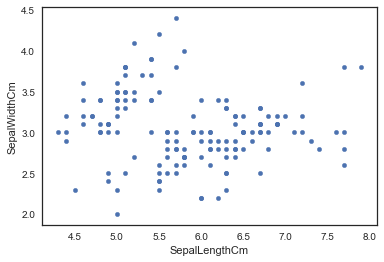

In [19]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

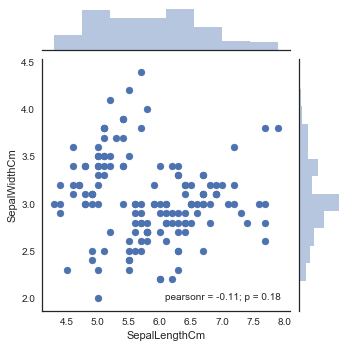

In [20]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

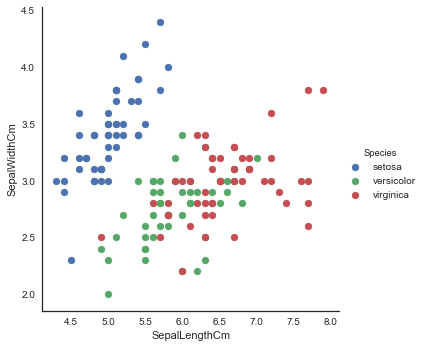

In [33]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species

#hue： 将被按不同分类的属性标色   size：画布的大小
#.add_legend() 添加图例
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

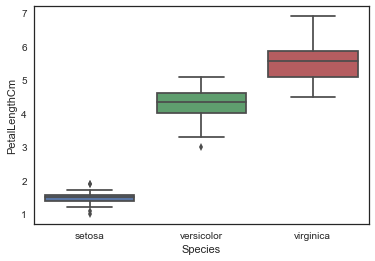

In [34]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

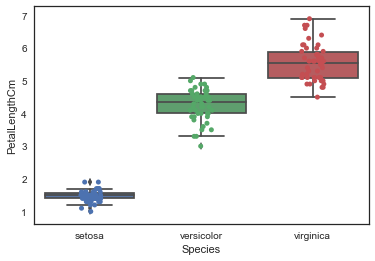

In [37]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

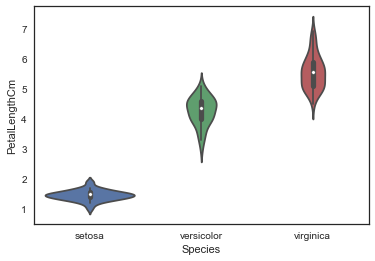

In [38]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

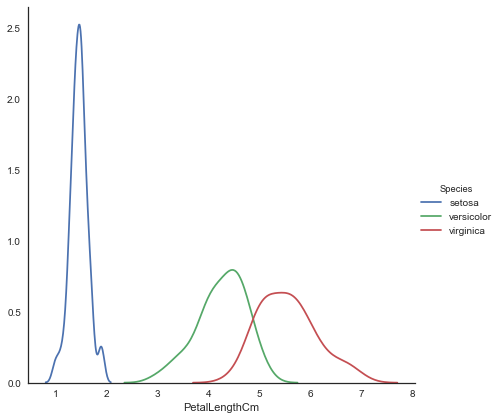

In [39]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

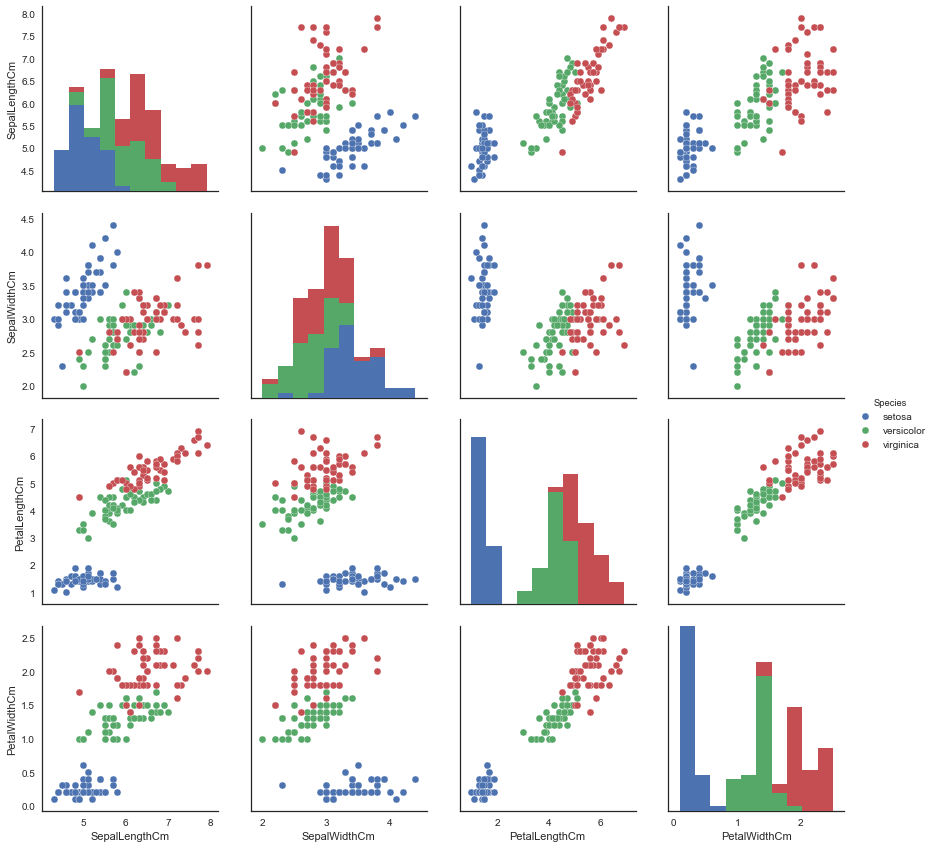

In [41]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris, hue="Species", size=3)

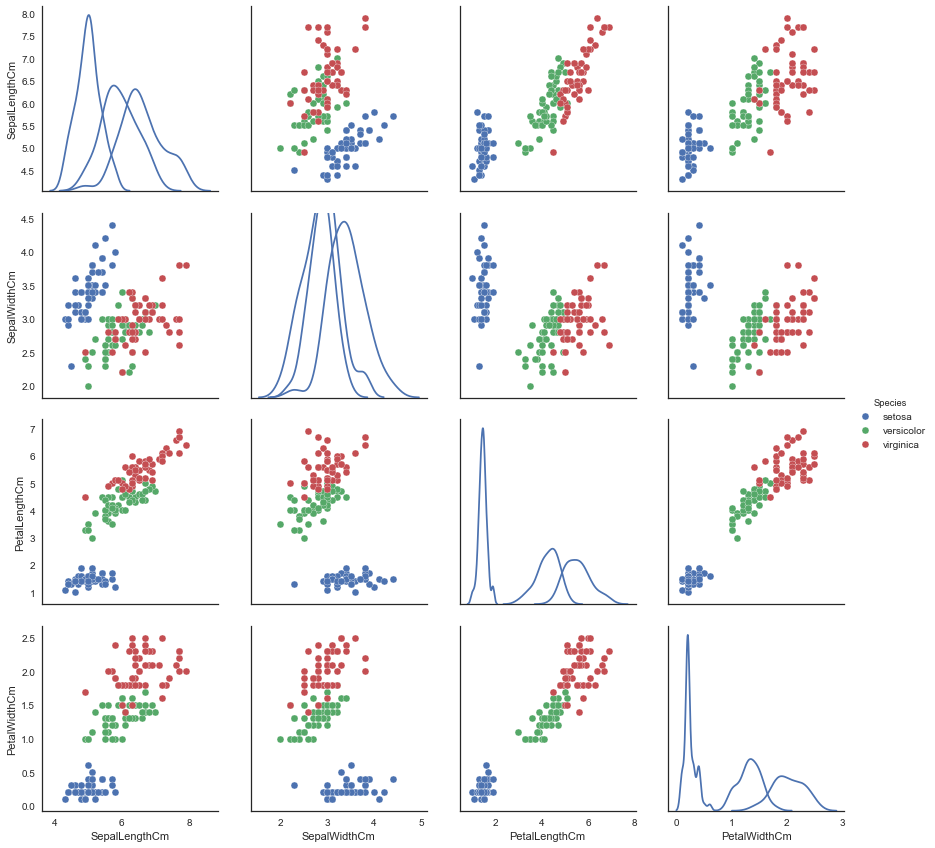

In [43]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(iris, hue="Species", size=3, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17cf47f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a18b2b710>]], dtype=object)

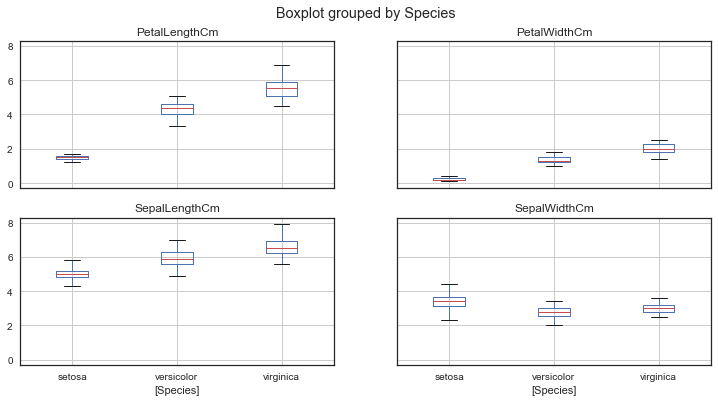

In [45]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
iris.boxplot(by="Species", figsize=(12, 6))

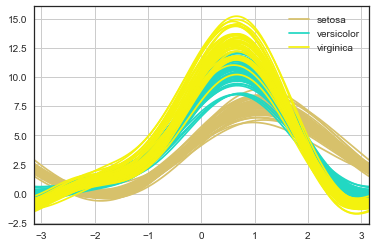

In [47]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.tools.plotting import andrews_curves
andrews_curves(iris, "Species")

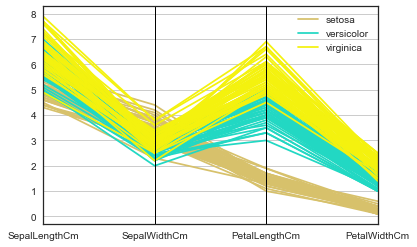

In [49]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris, "Species")

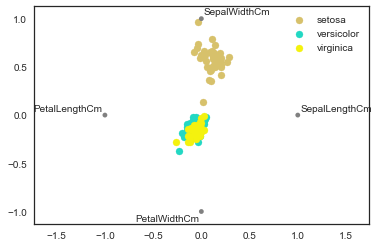

In [51]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(iris, "Species")

# Wrapping Up

I hope you enjoyed this quick introduction to some of the quick, simple data visualizations you can create with pandas, seaborn, and matplotlib in Python!

I encourage you to run through these examples yourself, tweaking them and seeing what happens. From there, you can try applying these methods to a new dataset and incorprating them into your own workflow!

See [Kaggle Datasets](https://www.kaggle.com/datasets) for other datasets to try visualizing. The [World Food Facts data](https://www.kaggle.com/openfoodfacts/world-food-facts) is an especially rich one for visualization.